In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot, plot_pacf, plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

In [167]:
df = pd.read_csv("../data/processed/train.csv", index_col="Date")
test = pd.read_csv("../data/processed/test.csv", index_col="Date")


In [168]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [171]:
df.shape

(3925, 6)

In [172]:
df.index

Index(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20', '2014-09-21',
       '2014-09-22', '2014-09-23', '2014-09-24', '2014-09-25', '2014-09-26',
       ...
       '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09', '2025-06-10',
       '2025-06-11', '2025-06-12', '2025-06-13', '2025-06-14', '2025-06-15'],
      dtype='object', name='Date', length=3925)

In [174]:
train, test = df.iloc[:-30,0], df.iloc[-30:,0]

In [175]:
train.shape

(3895,)

In [157]:
print(train.shape)
print(train.head())

(3895,)
Date
2014-09-17    465.864014
2014-09-18    456.859985
2014-09-19    424.102997
2014-09-20    394.673004
2014-09-21    408.084991
Name: Open, dtype: float64


In [158]:
model = ExponentialSmoothing(train,
                                trend = 'mul',
                                seasonal = "mul",
                                seasonal_periods=7).fit()

c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\srmpc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [159]:
predictions = model.forecast(len(test))
predictions

2025-05-17    104096.091831
2025-05-18    104253.236679
2025-05-19    104513.547651
2025-05-20    105495.334379
2025-05-21    105984.044253
2025-05-22    106718.589204
2025-05-23    106718.567176
2025-05-24    107096.939169
2025-05-25    107258.614136
2025-05-26    107526.429265
2025-05-27    108536.518613
2025-05-28    109039.316853
2025-05-29    109795.037019
2025-05-30    109795.014356
2025-05-31    110184.293930
2025-06-01    110350.629609
2025-06-02    110626.165224
2025-06-03    111665.373090
2025-06-04    112182.665829
2025-06-05    112960.171644
2025-06-06    112960.148327
2025-06-07    113360.649923
2025-06-08    113531.780671
2025-06-09    113815.259335
2025-06-10    114884.425138
2025-06-11    115416.630219
2025-06-12    116216.549711
2025-06-13    116216.525723
2025-06-14    116628.572844
2025-06-15    116804.636893
Freq: D, dtype: float64

In [160]:
test = test.asfreq('D')

In [161]:
test.head()

Date
2025-05-17   NaN
2025-05-18   NaN
2025-05-19   NaN
2025-05-20   NaN
2025-05-21   NaN
Freq: D, Name: Open, dtype: float64

In [162]:
# test.index = pd.to_datetime(test.index)

# train.index = pd.to_datetime(train.index)
# predictions.index = pd.to_datetime(predictions.index)
# test_aligned = test[test.index.isin(predictions.index)]

In [163]:
# combined = pd.concat([test, predictions], axis=1)
# combined.dropna(inplace=True)

# test_clean = combined.iloc[:, 0]
# predictions_clean = combined.iloc[:, 1]

# test = test_clean
# predictions = predictions_clean
# test.head(13)

In [164]:
predictions.head(13)

2025-05-17    104096.091831
2025-05-18    104253.236679
2025-05-19    104513.547651
2025-05-20    105495.334379
2025-05-21    105984.044253
2025-05-22    106718.589204
2025-05-23    106718.567176
2025-05-24    107096.939169
2025-05-25    107258.614136
2025-05-26    107526.429265
2025-05-27    108536.518613
2025-05-28    109039.316853
2025-05-29    109795.037019
Freq: D, dtype: float64

In [165]:
#function to asses model and vizualize output
def model_assesment(train, test, predictions, chart_title):
    test = test[test.index.isin(predictions.index)]
    predictions = predictions[predictions.index.isin(test.index)]

    plt.figure(figsize=(10,4))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(predictions, label='Forecast')
    plt.title(f"Train, Test and Prediction with {chart_title}")
    plt.legend()
    plt.show()

    mae = mean_absolute_error(test, predictions)
    rmse = mean_squared_error(test, predictions) ** 0.5
    mape = mean_absolute_percentage_error(test, predictions)
    print(f" The MAE is {mae:.2f}")
    print(f" The RMSE is {rmse:.2f}")
    print(f" The MAPE is {100 * mape:.2f}%")


C:\Users\srmpc\AppData\Local\Temp\ipykernel_30764\839997785.py:8: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  plt.plot(test, label='Test')


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x000002180AF0FE60>.

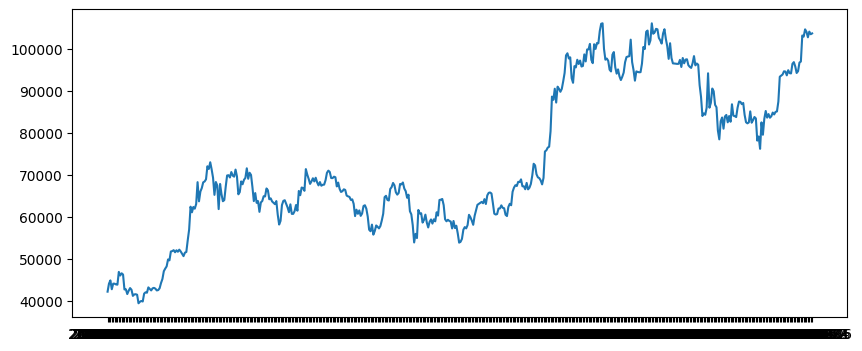

In [166]:
#Model Assesment
model_assesment(train['2024':], test, predictions, "Holt-Winters")